In [1]:
# Initialize a new VAME project
import functions_bondjango as bd
import functions_vame as fv
import paths
import vame
import random
import os
import shutil

In [2]:
# Manually define the config path if project has already been created
config = r"F:\VAME_projects\VAME_prey_4-Mar9-2021\config.yaml"

In [3]:
# get the file paths

# define the number of files to use
number_files = 0
# define the search string
search_string = ['rig:miniscope, result:succ', 'rig:miniscope, result:fail']

# define the target model
target_model = 'video_experiment'

# allocate memory for the files
files = []

# for all the queries
for query in search_string:
    # get the queryset
    files.append(bd.query_database(target_model, query))

# concatenate the list
files = [item for sublist in files for item in sublist]

if number_files > 0:
    # pick a random subset of number_files
    files = random.sample(files, number_files)

# get the video paths in a list
video_paths = [el['avi_path'] for el in files]

# define the working directory
working_directory = paths.vame_path

In [4]:
print(files[0]['preproc_files'][0])

dlc_path = files[0]['avi_path']
dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
print(dlc_path)

09_08_2020_15_56_34_miniscope_dg_200617_b_succ_injured_nofluo_preprocessing
J:\Drago Guggiana Nilo\Prey_capture\AnalyzedData\09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo_preproc.hdf5


In [5]:
# initialize the project
config = vame.init_new_project(project='VAME_prey_4', videos=video_paths, working_directory=working_directory, videotype='.avi')

Created "F:\VAME_projects\VAME_prey_4-Mar8-2021\videos"
Created "F:\VAME_projects\VAME_prey_4-Mar8-2021\data"
Created "F:\VAME_projects\VAME_prey_4-Mar8-2021\results"
Created "F:\VAME_projects\VAME_prey_4-Mar8-2021\model"
Copying the videos 

A VAME project has been created. 

Next use vame.create_trainset(config) to split your data into a train and test set. 
Afterwards you can use vame.rnn_model() to train the model on your data.


In [4]:
# Align video trajectories

# get the project folder
project_folder, _ = os.path.split(config)

# for all the videos
for el in files:
    print(f'Current file: {el["slug"]}')
    
    # if there is no preprocessing file, skip and warn
    if len(el['preproc_files']) == 0:
        print('no preprocessing file found')
        continue
    # load the avi file path
    dlc_path = el['avi_path']
    # edit it for the preprocessing path
    dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
    dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
    dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')

    # define the cropping
    crop_size = (1, 1)
    # egocentrically align the data and save
    fv.run_alignment(dlc_path, project_folder, '.avi', crop_size)


Current file: 09_08_2020_15_56_34_miniscope_dg_200617_b_succ_injured_nofluo


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 6853.60it/s]

Current file: 09_08_2020_15_54_36_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_50_32_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 123/123 [00:00<00:00, 6477.32it/s]


Current file: 09_08_2020_15_47_44_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_43_03_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_39_45_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233/233 [00:00<00:00, 6476.64it/s]

Current file: 09_08_2020_15_36_13_miniscope_dg_200617_b_succ_injured
Current file: 09_08_2020_15_32_30_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 138/138 [00:00<00:00, 8620.87it/s]


Current file: 09_08_2020_15_26_21_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_23_32_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_20_34_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 291/291 [00:00<00:00, 8823.41it/s]


Current file: 09_08_2020_15_16_25_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_13_51_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [00:00<00:00, 6594.67it/s]


Current file: 09_08_2020_15_10_07_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_06_13_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 7040.92it/s]

Current file: 09_08_2020_15_03_49_miniscope_dg_200701_a_succ_nomini
Current file: 09_08_2020_15_00_07_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_41_46_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 7234.59it/s]


Current file: 09_07_2020_15_38_41_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_35_51_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_32_36_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 9481.83it/s]


Current file: 09_07_2020_15_29_47_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_26_46_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_23_07_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 303/303 [00:00<00:00, 7773.41it/s]

Current file: 09_07_2020_15_18_17_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_02_53_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 10260.72it/s]


Current file: 09_07_2020_14_59_11_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_57_17_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_53_42_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/250 [00:00<?, ?it/s]

Current file: 09_07_2020_14_51_32_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_48_19_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 11464.71it/s]


Current file: 09_07_2020_14_45_29_miniscope_dg_200701_a_succ
Current file: 09_07_2020_14_42_14_miniscope_dg_200701_a_succ_injured
Current file: 09_06_2020_15_51_43_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 9948.32it/s]


Current file: 09_06_2020_15_47_33_miniscope_dg_200617_b_succ_injured
Current file: 09_06_2020_15_43_13_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_38_32_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 11652.23it/s]


Current file: 09_06_2020_15_35_22_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_31_55_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_28_50_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 6965.02it/s]

Current file: 09_06_2020_15_25_10_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_18_22_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_14_12_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 7047.79it/s]


Current file: 09_06_2020_15_11_37_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_09_11_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_05_22_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 10277.71it/s]


Current file: 09_06_2020_15_02_17_miniscope_dg_200701_a_succ
Current file: 09_06_2020_14_58_24_miniscope_dg_200701_a_succ
Current file: 09_06_2020_14_55_10_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 254/254 [00:00<00:00, 10156.96it/s]


Current file: 09_05_2020_16_30_05_miniscope_dg_200617_b_succ_injured
Current file: 09_05_2020_16_26_47_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_23_03_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 7656.14it/s]


Current file: 09_05_2020_16_19_09_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_16_21_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_12_58_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:00<00:00, 6220.11it/s]


Current file: 09_05_2020_16_09_14_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_06_30_miniscope_dg_200617_b_succ
Current file: 09_05_2020_15_59_18_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [00:00<00:00, 9497.50it/s]


Current file: 09_05_2020_15_56_40_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_52_46_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_50_02_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/163 [00:00<?, ?it/s]

Current file: 09_05_2020_15_47_48_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_45_35_miniscope_dg_200701_a_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 176/176 [00:00<00:00, 6518.19it/s]

Current file: 09_05_2020_15_42_56_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_40_48_miniscope_dg_200701_a_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 7936.18it/s]

Current file: 09_04_2020_17_26_53_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_23_03_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_17_48_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 6485.27it/s]


Current file: 09_04_2020_17_14_08_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_11_33_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_07_37_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 7148.12it/s]

Current file: 09_04_2020_17_03_57_miniscope_dg_200617_b_succ
Current file: 09_04_2020_17_00_52_miniscope_dg_200617_b_succ
Current file: 09_04_2020_16_52_56_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 6897.73it/s]


Current file: 09_04_2020_16_49_06_miniscope_dg_200701_a_succ_injured
Current file: 09_04_2020_16_46_11_miniscope_dg_200701_a_succ_distractedbytrash
Current file: 09_04_2020_16_43_01_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 11260.14it/s]


Current file: 09_04_2020_16_39_31_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_35_52_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_33_29_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 6960.42it/s]


Current file: 09_04_2020_16_30_05_miniscope_dg_200701_a_succ_injured
Current file: 09_03_2020_16_47_03_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_43_43_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/362 [00:00<?, ?it/s]

Current file: 09_03_2020_16_40_53_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_36_15_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 285/285 [00:00<00:00, 6785.90it/s]

Current file: 09_03_2020_16_31_10_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_28_25_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 7275.67it/s]

Current file: 09_03_2020_16_24_34_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_21_39_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_15_16_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 7156.24it/s]

Current file: 09_03_2020_16_12_49_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_09_44_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:00<00:00, 7324.37it/s]

Current file: 09_03_2020_16_06_54_miniscope_dg_200701_a_succ_injured
Current file: 09_03_2020_16_03_07_miniscope_dg_200701_a_succ
Current file: 09_03_2020_15_59_43_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:00<00:00, 6882.72it/s]

Current file: 09_03_2020_15_57_43_miniscope_dg_200701_a_succ
Current file: 09_03_2020_15_54_14_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 10874.20it/s]

Current file: 09_02_2020_17_38_56_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_35_23_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:00<00:00, 6761.39it/s]


Current file: 09_02_2020_17_32_19_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_27_37_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_24_54_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/315 [00:00<?, ?it/s]

Current file: 09_02_2020_17_21_30_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_17_37_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 10706.01it/s]


Current file: 09_02_2020_17_13_08_miniscope_dg_200617_b_succ
Current file: 09_02_2020_16_55_43_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_53_10_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 261/261 [00:00<00:00, 7250.33it/s]


Current file: 09_02_2020_16_50_16_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_45_55_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 9205.50it/s]

Current file: 09_02_2020_16_41_25_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_37_35_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_34_36_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [00:00<00:00, 6759.20it/s]


Current file: 09_02_2020_16_30_27_miniscope_dg_200701_a_succ_injured
Current file: 09_01_2020_16_58_35_miniscope_dg_200617_b_succ_injured
Current file: 09_01_2020_16_55_25_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 287/287 [00:00<00:00, 9896.29it/s]


Current file: 09_01_2020_16_52_15_miniscope_dg_200617_b_succ_injured
Current file: 09_01_2020_16_47_10_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_43_46_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:00<00:00, 8105.73it/s]


Current file: 09_01_2020_16_39_52_miniscope_dg_200617_b_succ_injured
Current file: 09_01_2020_16_34_42_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_29_24_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 7851.38it/s]

Current file: 09_01_2020_16_20_52_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_17_14_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_14_05_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 10005.04it/s]


Current file: 09_01_2020_16_10_27_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_07_13_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_03_24_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 6670.33it/s]

Current file: 09_01_2020_15_59_31_miniscope_dg_200701_a_succ
Current file: 09_01_2020_15_56_27_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<00:00, 9429.21it/s]

Current file: 08_31_2020_16_42_25_miniscope_dg_200617_b_succ_injured
Current file: 08_31_2020_16_39_00_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_36_15_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 9814.92it/s]

Current file: 08_31_2020_16_32_34_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_29_59_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_26_28_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 168/168 [00:00<00:00, 6723.57it/s]

Current file: 08_31_2020_16_22_19_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_17_53_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:00<00:00, 9171.85it/s]


Current file: 08_31_2020_16_10_12_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_05_52_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 6516.00it/s]

Current file: 08_31_2020_16_01_53_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_59_34_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_54_51_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 9229.75it/s]

Current file: 08_31_2020_15_50_06_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_46_43_miniscope_dg_200701_a_succ
Current file: 08_31_2020_15_41_54_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/333 [00:00<?, ?it/s]

Current file: 08_30_2020_16_35_54_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_31_45_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [00:00<00:00, 7436.62it/s]

Current file: 08_30_2020_16_28_07_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_24_08_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_20_40_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 198/198 [00:00<00:00, 10430.84it/s]

Current file: 08_30_2020_16_17_16_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_14_23_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_10_58_miniscope_dg_200617_b_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 6629.30it/s]

Current file: 08_30_2020_16_03_21_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_59_37_miniscope_dg_200701_a_succ_injured
Current file: 08_30_2020_15_56_29_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:00<00:00, 7152.14it/s]

Current file: 08_30_2020_15_53_35_miniscope_dg_200701_a_succ_injured
Current file: 08_30_2020_15_50_51_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_47_33_miniscope_dg_200701_a_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 288/288 [00:00<00:00, 11083.11it/s]

Current file: 08_30_2020_15_44_44_miniscope_dg_200701_a_succ
Current file: 08_30_2020_15_40_53_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 9541.12it/s]


Current file: 08_29_2020_16_54_07_miniscope_dg_200617_b_succ_nofluo
Current file: 08_29_2020_16_50_48_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_46_00_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/254 [00:00<?, ?it/s]

Current file: 08_29_2020_16_42_06_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_38_23_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 10306.64it/s]


Current file: 08_29_2020_16_33_45_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_31_16_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 9904.36it/s]


Current file: 08_29_2020_16_26_47_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_17_59_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_15_31_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [00:00<00:00, 7842.60it/s]

Current file: 08_29_2020_16_12_42_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_08_29_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 389/389 [00:00<00:00, 7208.40it/s]


Current file: 08_29_2020_16_04_30_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_01_17_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/389 [00:00<?, ?it/s]

Current file: 08_29_2020_15_58_33_miniscope_dg_200701_a_succ
Current file: 08_29_2020_15_55_24_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/339 [00:00<?, ?it/s]

Current file: 08_21_2020_16_33_02_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_28_13_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 297/297 [00:00<00:00, 10996.91it/s]

Current file: 08_21_2020_16_24_35_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_18_56_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_12_47_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 9031.38it/s]

Current file: 08_21_2020_16_08_48_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_03_54_miniscope_dg_200617_b_succ
Current file: 08_21_2020_15_58_04_miniscope_dg_200617_b_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 6680.11it/s]

Current file: 08_21_2020_15_48_23_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_45_14_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_42_56_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 191/191 [00:00<00:00, 10058.66it/s]


Current file: 08_21_2020_15_39_23_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_36_39_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_34_25_miniscope_dg_200701_a_succ_injured


Align frames:   0%|                                                                                                                                                                                                                                | 0/279 [00:00<?, ?it/s]

Current file: 08_21_2020_15_32_26_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_29_32_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/202 [00:00<?, ?it/s]

Current file: 08_20_2020_16_43_39_miniscope_dg_200617_b_succ_injured
Current file: 08_20_2020_16_40_35_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 219/219 [00:00<00:00, 9517.10it/s]

Current file: 08_20_2020_16_36_12_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_31_59_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_27_00_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 299/299 [00:00<00:00, 9645.12it/s]


Current file: 08_20_2020_16_23_32_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_18_53_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_13_59_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/535 [00:00<?, ?it/s]

Current file: 08_20_2020_16_06_26_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_03_02_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 675/675 [00:00<00:00, 8442.34it/s]

Current file: 08_20_2020_15_57_27_miniscope_dg_200701_a_succ_grabbedcable
Current file: 08_20_2020_15_54_48_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 238/238 [00:00<00:00, 9524.78it/s]


Current file: 08_20_2020_15_51_33_miniscope_dg_200701_a_succ
Current file: 08_20_2020_15_48_39_miniscope_dg_200701_a_succ
Current file: 08_20_2020_15_43_36_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 6960.35it/s]


Current file: 08_20_2020_15_40_41_miniscope_dg_200701_a_succ
Current file: 08_19_2020_16_55_33_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 197/197 [00:00<00:00, 7039.76it/s]

Current file: 08_19_2020_16_52_39_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_50_11_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/403 [00:00<?, ?it/s]

Current file: 08_19_2020_16_44_52_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_39_04_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/338 [00:00<?, ?it/s]

Current file: 08_19_2020_16_35_29_miniscope_dg_200617_b_succ_injured
Current file: 08_19_2020_16_33_11_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 454/454 [00:00<00:00, 10810.74it/s]


Current file: 08_19_2020_16_27_02_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_16_55_miniscope_dg_200701_a_succ_noncon


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 8999.94it/s]

Current file: 08_19_2020_16_11_32_miniscope_dg_200701_a_succ_injured
Current file: 08_19_2020_16_09_08_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 592/592 [00:00<00:00, 7793.63it/s]

Current file: 08_19_2020_16_05_59_miniscope_dg_200701_a_succ_grabbedcable
Current file: 08_19_2020_16_01_41_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 243/243 [00:00<00:00, 7147.28it/s]

Current file: 08_19_2020_15_58_22_miniscope_dg_200701_a_succ
Current file: 08_19_2020_15_55_28_miniscope_dg_200701_a_succ_injured
Current file: 08_19_2020_15_51_39_miniscope_dg_200701_a_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 7413.73it/s]


Current file: 08_18_2020_16_45_57_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_41_33_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/397 [00:00<?, ?it/s]

Current file: 08_18_2020_16_38_40_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_34_54_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 478/478 [00:00<00:00, 6736.30it/s]


Current file: 08_18_2020_16_31_06_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_28_42_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 9582.27it/s]

Current file: 08_18_2020_16_25_33_miniscope_dg_200617_b_succ
Current file: 08_18_2020_16_23_10_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/420 [00:00<?, ?it/s]

Current file: 08_18_2020_16_15_09_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_11_41_miniscope_dg_200701_a_succ_grabbedcable


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 7302.87it/s]

Current file: 08_18_2020_16_08_29_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_04_51_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 211/211 [00:00<00:00, 7038.09it/s]

Current file: 08_18_2020_16_01_32_miniscope_dg_200701_a_succ_injured
Current file: 08_18_2020_15_59_09_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 10929.81it/s]


Current file: 08_18_2020_15_54_55_miniscope_dg_200701_a_succ
Current file: 08_18_2020_15_51_16_miniscope_dg_200701_a_succ
Current file: 08_17_2020_16_25_53_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<00:00, 6905.46it/s]

Current file: 08_17_2020_16_22_44_miniscope_dg_200617_b_succ_injured
Current file: 08_17_2020_16_19_31_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_16_18_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 7035.32it/s]

Current file: 08_17_2020_16_12_24_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_10_15_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 6798.14it/s]

Current file: 08_17_2020_16_06_06_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_01_03_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 7312.24it/s]


Current file: 08_17_2020_15_50_49_miniscope_dg_200701_a_succ_injured
Current file: 08_17_2020_15_47_55_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_45_26_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/382 [00:00<?, ?it/s]

Current file: 08_17_2020_15_43_31_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_40_54_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 9244.20it/s]

Current file: 08_17_2020_15_38_44_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_36_48_miniscope_dg_200701_a_succ
Current file: 08_17_2020_15_34_07_miniscope_dg_200701_a_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 6754.46it/s]

Current file: 08_16_2020_16_27_15_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_23_16_miniscope_dg_200617_b_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 232/232 [00:00<00:00, 9285.28it/s]

Current file: 08_16_2020_16_18_28_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_15_42_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_13_04_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 7505.02it/s]

Current file: 08_16_2020_16_09_31_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_07_07_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 6427.43it/s]

Current file: 08_16_2020_16_04_28_miniscope_dg_200617_b_succ
Current file: 08_16_2020_15_56_30_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_52_46_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 318/318 [00:00<00:00, 6631.81it/s]


Current file: 08_16_2020_15_50_17_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_46_53_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:00<00:00, 6797.71it/s]

Current file: 08_16_2020_15_43_35_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_41_26_miniscope_dg_200701_a_succ_injured



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:00<00:00, 6382.50it/s]

Current file: 08_16_2020_15_39_22_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_35_26_miniscope_dg_200701_a_succ
Current file: 08_15_2020_16_36_57_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/255 [00:00<?, ?it/s]

Current file: 08_15_2020_16_34_53_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_31_30_miniscope_dg_200617_b_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                                                | 0/268 [00:00<?, ?it/s]

Current file: 08_15_2020_16_28_36_miniscope_dg_200617_b_succ_injured
Current file: 08_15_2020_16_25_08_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 9457.00it/s]


Current file: 08_15_2020_16_22_29_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_18_50_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_16_11_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/337 [00:00<?, ?it/s]

Current file: 08_15_2020_16_12_31_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_05_59_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:00<00:00, 8876.32it/s]

Current file: 08_15_2020_16_02_16_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_58_47_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_54_28_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 9965.47it/s]


Current file: 08_15_2020_15_52_25_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_49_06_miniscope_dg_200701_a_succ
Current file: 08_15_2020_15_45_13_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 8078.64it/s]

Current file: 08_15_2020_15_41_21_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_57_32_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 350/350 [00:00<00:00, 7782.14it/s]


Current file: 08_14_2020_15_54_58_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_50_50_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 380/380 [00:00<00:00, 10275.19it/s]


Current file: 08_14_2020_15_47_26_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_44_42_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 9689.35it/s]


Current file: 08_14_2020_15_40_19_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_37_49_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_34_20_miniscope_dg_200617_b_succ_injured


Align frames:   0%|                                                                                                                                                                                                                                | 0/383 [00:00<?, ?it/s]

Current file: 08_14_2020_15_28_27_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_23_43_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<00:00, 6498.71it/s]


Current file: 08_14_2020_15_21_09_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_17_30_miniscope_dg_200701_a_succ_injured
Current file: 08_14_2020_15_09_52_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 7881.97it/s]

Current file: 08_14_2020_15_07_03_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_04_44_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_02_32_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/268 [00:00<?, ?it/s]

Current file: 08_13_2020_16_35_25_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_32_11_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 249/249 [00:00<00:00, 7549.87it/s]


Current file: 08_13_2020_16_26_36_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_21_12_miniscope_dg_200617_b_succ_injured


Align frames:   0%|                                                                                                                                                                                                                                | 0/408 [00:00<?, ?it/s]

Current file: 08_13_2020_16_17_47_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_12_01_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/337 [00:00<?, ?it/s]

Current file: 08_13_2020_16_09_18_miniscope_dg_200617_b_succ_injured
Current file: 08_13_2020_16_05_09_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/323 [00:00<?, ?it/s]

Current file: 08_13_2020_15_59_37_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_55_14_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 8805.60it/s]


Current file: 08_13_2020_15_52_37_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_49_59_miniscope_dg_200701_a_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 7416.79it/s]


Current file: 08_13_2020_15_45_14_miniscope_dg_200701_a_succ_injured
Current file: 08_13_2020_15_42_16_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_39_43_miniscope_dg_200701_a_succ_movecam


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:00<00:00, 7970.09it/s]

Current file: 08_13_2020_15_36_29_miniscope_dg_200701_a_succ
Current file: 08_12_2020_16_30_56_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_24_56_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 7959.76it/s]

Current file: 08_12_2020_16_21_45_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_17_05_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 10005.50it/s]

Current file: 08_12_2020_16_14_41_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_12_08_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_06_17_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 224/224 [00:00<00:00, 7471.19it/s]

Current file: 08_12_2020_16_02_32_miniscope_dg_200617_b_succ
Current file: 08_12_2020_15_56_49_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/329 [00:00<?, ?it/s]

Current file: 08_12_2020_15_51_54_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_47_44_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:00<00:00, 7974.85it/s]

Current file: 08_12_2020_15_44_23_miniscope_dg_200701_a_succ_noncon
Current file: 08_12_2020_15_39_17_miniscope_dg_200701_a_succ



Align frames:  89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 740/833 [00:00<00:00, 7329.67it/s]

Current file: 08_12_2020_15_35_36_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 288/288 [00:00<00:00, 8233.99it/s]

Current file: 08_12_2020_15_32_21_miniscope_dg_200701_a_succ_injured
Current file: 08_12_2020_15_29_25_miniscope_dg_200701_a_succ
Current file: 08_11_2020_16_10_57_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 308/308 [00:00<00:00, 9942.09it/s]

Current file: 08_11_2020_16_06_06_miniscope_dg_200617_b_succ
Current file: 08_11_2020_16_03_21_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/362 [00:00<?, ?it/s]

Current file: 08_11_2020_16_00_10_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_56_40_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/235 [00:00<?, ?it/s]

Current file: 08_11_2020_15_51_51_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_47_26_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 167/167 [00:00<00:00, 6962.09it/s]

Current file: 08_11_2020_15_44_45_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_33_47_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 8123.89it/s]


Current file: 08_11_2020_15_31_17_miniscope_dg_200701_a_succ_injured
Current file: 08_11_2020_15_27_09_miniscope_dg_200701_a_succ_injured
Current file: 08_11_2020_15_25_00_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315/315 [00:00<00:00, 7163.49it/s]

Current file: 08_11_2020_15_22_04_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_17_38_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 8306.09it/s]


Current file: 08_11_2020_15_15_22_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_12_33_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/357 [00:00<?, ?it/s]

Current file: 08_10_2020_17_33_00_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_27_54_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 236/236 [00:00<00:00, 9836.39it/s]

Current file: 08_10_2020_17_24_14_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_20_19_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_16_40_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/266 [00:00<?, ?it/s]

Current file: 08_10_2020_17_13_00_miniscope_dg_200617_b_succ
Current file: 08_10_2020_17_07_51_miniscope_dg_200617_b_succ_injured


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 463/463 [00:00<00:00, 8052.26it/s]

Current file: 08_10_2020_17_04_35_miniscope_dg_200617_b_succ
Current file: 08_10_2020_16_56_35_miniscope_dg_200701_a_succ_injured



Align frames:   0%|                                                                                                                                                                                                                                | 0/353 [00:00<?, ?it/s]

Current file: 08_10_2020_16_52_15_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_48_58_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/385 [00:00<?, ?it/s]

Current file: 08_10_2020_16_44_58_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_41_32_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/301 [00:00<?, ?it/s]

Current file: 08_10_2020_16_38_11_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_34_57_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/361 [00:00<?, ?it/s]

Current file: 08_10_2020_16_31_43_miniscope_dg_200701_a_succ
Current file: 08_09_2020_16_26_36_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/481 [00:00<?, ?it/s]

Current file: 08_09_2020_16_23_45_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_17_40_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/326 [00:00<?, ?it/s]

Current file: 08_09_2020_16_13_20_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_08_16_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/386 [00:00<?, ?it/s]

Current file: 08_09_2020_16_03_39_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_01_33_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/269 [00:00<?, ?it/s]

Current file: 08_09_2020_15_57_15_miniscope_dg_200617_b_succ
Current file: 08_09_2020_15_51_40_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/373 [00:00<?, ?it/s]

Current file: 08_09_2020_15_48_25_miniscope_dg_200701_a_succ_nomini
Current file: 08_09_2020_15_44_35_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 377/377 [00:00<00:00, 9670.97it/s]


Current file: 08_09_2020_15_05_48_miniscope_dg_200701_a_succ
Current file: 08_09_2020_15_03_09_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 377/377 [00:00<00:00, 7857.23it/s]


Current file: 08_09_2020_14_59_34_miniscope_dg_200701_a_succ_injured
Current file: 08_09_2020_14_55_56_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/367 [00:00<?, ?it/s]

Current file: 08_09_2020_14_53_16_miniscope_dg_200701_a_succ
Current file: 08_08_2020_16_29_56_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 456/456 [00:00<00:00, 8147.51it/s]


Current file: 08_08_2020_16_26_31_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_18_51_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/403 [00:00<?, ?it/s]

Current file: 08_08_2020_16_15_39_miniscope_dg_200617_b_succ
Current file: 08_08_2020_16_12_42_miniscope_dg_200617_b_succ_noncon


Align frames:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 743/765 [00:00<00:00, 7361.35it/s]

Current file: 08_08_2020_16_08_14_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 611/611 [00:00<00:00, 7738.47it/s]


Current file: 08_08_2020_16_00_22_miniscope_dg_200617_b_succ
Current file: 08_08_2020_15_57_37_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 245/245 [00:00<00:00, 7656.35it/s]

Current file: 08_08_2020_15_50_40_miniscope_dg_200701_a_succ_noncon
Current file: 08_08_2020_15_47_53_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 10416.62it/s]


Current file: 08_08_2020_15_44_28_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_38_09_miniscope_dg_200701_a_succ_injured


Align frames:   0%|                                                                                                                                                                                                                               | 0/1396 [00:00<?, ?it/s]

Current file: 08_08_2020_15_33_57_miniscope_dg_200701_a_succ_injured_noncon


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 345/345 [00:00<00:00, 8419.41it/s]


Current file: 08_08_2020_15_30_48_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_27_33_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 553/553 [00:00<00:00, 9218.43it/s]


Current file: 08_08_2020_15_24_06_miniscope_dg_200701_a_succ
Current file: 08_07_2020_17_13_15_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 434/434 [00:00<00:00, 9043.58it/s]


Current file: 08_07_2020_17_08_34_miniscope_dg_200617_b_succ
Current file: 08_07_2020_17_03_26_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 575/575 [00:00<00:00, 8460.71it/s]


Current file: 08_07_2020_16_57_16_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_52_22_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 396/396 [00:00<00:00, 7619.71it/s]


Current file: 08_07_2020_16_48_37_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_43_52_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/311 [00:00<?, ?it/s]

Current file: 08_07_2020_16_39_29_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_28_48_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 549/549 [00:00<00:00, 8320.50it/s]

Current file: 08_07_2020_16_24_44_miniscope_dg_200701_a_succ_noncon
Current file: 08_07_2020_16_21_53_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 346/346 [00:00<00:00, 10175.85it/s]


Current file: 08_07_2020_16_16_35_miniscope_dg_200701_a_succ
Current file: 08_07_2020_16_13_27_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 555/555 [00:00<00:00, 7823.67it/s]


Current file: 08_07_2020_16_08_55_miniscope_dg_200701_a_succ
Current file: 08_07_2020_16_05_16_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 436/436 [00:00<00:00, 7650.93it/s]


Current file: 08_07_2020_16_01_27_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_53_34_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 401/401 [00:00<00:00, 6577.62it/s]

Current file: 08_06_2020_18_50_24_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_46_29_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<00:00, 6671.42it/s]

Current file: 08_06_2020_18_42_09_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_35_22_miniscope_dg_200617_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 627/627 [00:00<00:00, 7743.51it/s]


Current file: 08_06_2020_18_30_31_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_24_41_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1129 [00:00<?, ?it/s]

Current file: 08_06_2020_18_15_22_miniscope_dg_200617_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 445/445 [00:00<00:00, 8905.32it/s]


Current file: 08_06_2020_18_07_32_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_02_17_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/989 [00:00<?, ?it/s]

Current file: 08_06_2020_17_58_44_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 802/802 [00:00<00:00, 9223.56it/s]

Current file: 08_06_2020_17_54_57_miniscope_dg_200701_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:00<00:00, 9405.38it/s]


Current file: 08_06_2020_17_41_32_miniscope_dg_200701_a_succ
Current file: 08_06_2020_17_37_15_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 671/671 [00:00<00:00, 7543.79it/s]

Current file: 08_06_2020_17_33_37_miniscope_dg_200701_a_succ
Current file: 08_05_2020_16_20_09_miniscope_dg_200617_b_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/2345 [00:00<?, ?it/s]

Current file: 08_05_2020_16_11_00_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1362 [00:00<?, ?it/s]

Current file: 08_05_2020_16_06_18_miniscope_dg_200617_b_succ_earlystop


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1362/1362 [00:00<00:00, 7698.43it/s]


Current file: 08_05_2020_15_55_12_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1199 [00:00<?, ?it/s]

Current file: 08_05_2020_15_43_21_miniscope_dg_200701_a_succ


Align frames:  74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                      | 798/1075 [00:00<00:00, 7903.75it/s]

Current file: 08_05_2020_15_36_29_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1608 [00:00<?, ?it/s]

Current file: 08_05_2020_15_29_56_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/2671 [00:00<?, ?it/s]

Current file: 08_05_2020_15_22_44_miniscope_dg_200701_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 516/516 [00:00<00:00, 7590.20it/s]


Current file: 03_13_2020_14_00_19_miniscope_mm_200129_b_succ
Current file: 03_13_2020_13_53_47_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/361 [00:00<?, ?it/s]

Current file: 03_13_2020_13_49_34_miniscope_mm_200129_b_succ
Current file: 03_13_2020_13_44_46_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 193/193 [00:00<00:00, 7725.13it/s]

Current file: 03_13_2020_13_25_36_miniscope_mm_200129_a_succ
Current file: 03_13_2020_13_20_21_miniscope_mm_200129_a_succ
Current file: 03_13_2020_13_14_07_miniscope_mm_200129_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/196 [00:00<?, ?it/s]

Current file: 03_13_2020_13_10_44_miniscope_mm_200129_a_succ
Current file: 03_12_2020_16_56_04_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:00<00:00, 7091.32it/s]

Current file: 03_12_2020_16_52_33_miniscope_mm_200129_b_succ
Current file: 03_12_2020_16_49_07_miniscope_mm_200129_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 165/165 [00:00<00:00, 9161.75it/s]


Current file: 03_12_2020_16_44_47_miniscope_mm_200129_b_succ
Current file: 03_12_2020_16_32_46_miniscope_mm_200129_a_succ
Current file: 03_12_2020_16_30_37_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226/226 [00:00<00:00, 7067.33it/s]


Current file: 03_12_2020_16_25_39_miniscope_mm_200129_a_succ
Current file: 03_12_2020_16_23_09_miniscope_mm_200129_a_succ
Current file: 03_11_2020_16_52_20_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 8774.08it/s]

Current file: 03_11_2020_16_47_49_miniscope_mm_200129_b_succ
Current file: 03_11_2020_16_42_47_miniscope_mm_200129_b_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/337 [00:00<?, ?it/s]

Current file: 03_11_2020_16_37_26_miniscope_mm_200129_b_succ
Current file: 03_11_2020_16_14_11_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 9919.79it/s]

Current file: 03_11_2020_16_10_08_miniscope_mm_200129_a_succ
Current file: 03_11_2020_16_02_24_miniscope_mm_200129_a_succ
Current file: 03_11_2020_15_58_51_miniscope_mm_200129_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/286 [00:00<?, ?it/s]

Current file: 03_10_2020_16_21_31_miniscope_mm_200129_b_succ
Current file: 03_10_2020_16_17_45_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 8187.56it/s]

Current file: 03_10_2020_16_13_35_miniscope_mm_200129_b_succ
Current file: 03_10_2020_16_09_06_miniscope_mm_200129_b_succ
Current file: 03_10_2020_16_00_39_miniscope_mm_200129_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/319 [00:00<?, ?it/s]

Current file: 03_10_2020_15_56_24_miniscope_mm_200129_a_succ
Current file: 03_10_2020_15_52_35_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 302/302 [00:00<00:00, 8887.48it/s]

Current file: 03_10_2020_15_48_48_miniscope_mm_200129_a_succ
Current file: 03_06_2020_16_30_52_miniscope_mm_200129_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 272/272 [00:00<00:00, 9066.75it/s]


Current file: 03_06_2020_16_25_04_miniscope_mm_200129_b_succ
Current file: 03_06_2020_16_20_40_miniscope_mm_200129_b_succ
Current file: 03_06_2020_16_17_02_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/425 [00:00<?, ?it/s]

Current file: 03_06_2020_16_04_24_miniscope_mm_200129_a_succ
Current file: 03_06_2020_16_00_37_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 467/467 [00:00<00:00, 7538.92it/s]


Current file: 03_06_2020_15_53_37_miniscope_mm_200129_a_succ
Current file: 03_06_2020_15_49_03_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 688/688 [00:00<00:00, 8098.70it/s]

Current file: 03_05_2020_16_13_46_miniscope_mm_200129_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 587/587 [00:00<00:00, 8763.95it/s]


Current file: 03_05_2020_16_07_59_miniscope_mm_200129_b_succ
Current file: 03_05_2020_15_59_48_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 472/472 [00:00<00:00, 9079.04it/s]


Current file: 03_05_2020_15_56_12_miniscope_mm_200129_b_succ
Current file: 03_05_2020_15_46_40_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/973 [00:00<?, ?it/s]

Current file: 03_05_2020_15_39_38_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 397/397 [00:00<00:00, 7090.98it/s]


Current file: 03_05_2020_15_35_45_miniscope_mm_200129_a_succ
Current file: 03_05_2020_15_32_18_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 622/622 [00:00<00:00, 8520.97it/s]


Current file: 03_04_2020_16_18_47_miniscope_mm_200129_b_succ
Current file: 03_04_2020_16_16_18_miniscope_mm_200129_b_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 624/624 [00:00<00:00, 9046.20it/s]

Current file: 03_04_2020_16_12_03_miniscope_mm_200129_b_succ
Current file: 03_04_2020_16_05_47_miniscope_mm_200129_b_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 441/441 [00:00<00:00, 7605.56it/s]


Current file: 03_04_2020_15_54_26_miniscope_mm_200129_a_succ
Current file: 03_04_2020_15_46_47_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:00<00:00, 8990.26it/s]


Current file: 03_04_2020_15_42_07_miniscope_mm_200129_a_succ
Current file: 03_04_2020_15_37_26_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1442 [00:00<?, ?it/s]

Current file: 03_02_2020_16_29_48_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1239 [00:00<?, ?it/s]

Current file: 03_02_2020_16_20_39_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/704 [00:00<?, ?it/s]

Current file: 03_02_2020_15_59_15_miniscope_mm_200129_a_succ
Current file: 03_02_2020_15_54_55_miniscope_mm_200129_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 417/417 [00:00<00:00, 7618.80it/s]


Current file: 03_02_2020_15_50_05_miniscope_mm_200129_a_succ
Current file: 03_02_2020_15_45_20_miniscope_mm_200129_a_succ_nomini


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1009/1009 [00:00<00:00, 8343.61it/s]

Current file: 03_02_2020_15_41_21_miniscope_mm_200129_a_succ_nomini



Align frames:  83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 835/1006 [00:00<00:00, 8272.38it/s]

Current file: 03_02_2020_15_35_18_miniscope_mm_200129_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/452 [00:00<?, ?it/s]

Current file: 12_16_2019_16_31_08_miniscope_mm_191108_a_succ
Current file: 12_16_2019_16_27_17_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 305/305 [00:00<00:00, 7262.76it/s]


Current file: 12_12_2019_15_32_29_miniscope_mm_191108_a_succ
Current file: 12_12_2019_15_27_48_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/376 [00:00<?, ?it/s]

Current file: 12_12_2019_15_16_04_miniscope_mm_191108_a_succ
Current file: 12_12_2019_15_08_15_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/330 [00:00<?, ?it/s]

Current file: 12_12_2019_15_04_45_miniscope_mm_191108_a_succ
Current file: 12_12_2019_15_00_56_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/502 [00:00<?, ?it/s]

Current file: 12_12_2019_14_58_00_miniscope_mm_191108_a_succ_nofluo
Current file: 12_11_2019_17_09_52_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 493/493 [00:00<00:00, 8357.62it/s]


Current file: 12_11_2019_17_05_25_miniscope_mm_191108_a_succ
Current file: 12_11_2019_17_01_21_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/394 [00:00<?, ?it/s]

Current file: 12_11_2019_16_56_38_miniscope_mm_191108_a_succ
Current file: 12_11_2019_16_53_36_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<00:00, 8141.56it/s]


Current file: 12_11_2019_16_49_04_miniscope_mm_191108_a_succ_miniscopeafterbonsai
Current file: 12_11_2019_16_45_12_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 9332.86it/s]


Current file: 12_10_2019_16_57_26_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_16_53_34_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_16_48_14_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 309/309 [00:00<00:00, 7924.14it/s]


Current file: 12_10_2019_16_44_10_miniscope_mm_191107_a_succ_nomini
Current file: 12_10_2019_16_36_38_miniscope_mm_191106_a_succ_nomini
Current file: 12_10_2019_15_39_55_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/362 [00:00<?, ?it/s]

Current file: 12_10_2019_15_35_36_miniscope_mm_191108_a_succ
Current file: 12_10_2019_15_30_07_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 613/613 [00:00<00:00, 7966.13it/s]


Current file: 12_10_2019_15_19_56_miniscope_mm_191108_a_succ
Current file: 12_10_2019_15_15_08_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440/440 [00:00<00:00, 7859.12it/s]

Current file: 12_10_2019_15_10_23_miniscope_mm_191108_a_succ
Current file: 12_10_2019_15_05_17_miniscope_mm_191108_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 328/328 [00:00<00:00, 9653.04it/s]

Current file: 12_10_2019_15_00_45_miniscope_mm_191108_a_succ
Current file: 12_09_2019_17_04_36_miniscope_mm_191107_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 305/305 [00:00<00:00, 8974.13it/s]


Current file: 12_09_2019_17_01_33_miniscope_mm_191107_a_succ_bad_track_nomini
Current file: 12_09_2019_16_58_58_miniscope_mm_191107_a_succ_nomini
Current file: 12_09_2019_16_53_42_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 927/927 [00:00<00:00, 7793.20it/s]

Current file: 12_09_2019_16_49_50_miniscope_mm_191106_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 7995.58it/s]

Current file: 12_09_2019_16_46_19_miniscope_mm_191106_a_succ_nomini
Current file: 12_09_2019_16_41_05_miniscope_mm_191105_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                                                                | 0/439 [00:00<?, ?it/s]

Current file: 12_09_2019_16_38_36_miniscope_mm_191105_a_succ_nomini
Current file: 12_09_2019_16_34_39_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 8416.98it/s]

Current file: 12_09_2019_16_30_00_miniscope_mm_191105_a_succ_nomini
Current file: 12_09_2019_15_34_10_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/395 [00:00<?, ?it/s]

Current file: 12_09_2019_15_30_13_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_25_14_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 465/465 [00:00<00:00, 8162.52it/s]

Current file: 12_09_2019_15_21_10_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_16_05_miniscope_mm_191108_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 328/328 [00:00<00:00, 8200.11it/s]


Current file: 12_09_2019_15_12_24_miniscope_mm_191108_a_succ
Current file: 12_09_2019_15_08_33_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/222 [00:00<?, ?it/s]

Current file: 12_09_2019_15_04_06_miniscope_mm_191108_a_succ
Current file: 12_07_2019_16_38_08_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 7304.75it/s]

Current file: 12_07_2019_16_34_28_miniscope_mm_191107_a_succ_nomini
Current file: 12_07_2019_16_29_31_miniscope_mm_191107_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 403/403 [00:00<00:00, 8765.82it/s]

Current file: 12_07_2019_16_23_23_miniscope_mm_191106_a_succ_nomini
Current file: 12_07_2019_16_18_20_miniscope_mm_191106_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:00<00:00, 8339.12it/s]

Current file: 12_07_2019_16_09_54_miniscope_mm_191105_a_succ_nomini
Current file: 12_07_2019_16_05_30_miniscope_mm_191105_a_succ_nomini
Current file: 12_07_2019_15_52_11_miniscope_mm_191108_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 496/496 [00:00<00:00, 8196.91it/s]

Current file: 12_07_2019_15_47_28_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_43_37_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/714 [00:00<?, ?it/s]

Current file: 12_07_2019_15_39_33_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_34_47_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/229 [00:00<?, ?it/s]

Current file: 12_07_2019_15_29_41_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_24_53_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 484/484 [00:00<00:00, 7684.17it/s]


Current file: 12_07_2019_15_20_56_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_15_49_miniscope_mm_191108_a_succ


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 473/473 [00:00<00:00, 9465.79it/s]

Current file: 12_07_2019_15_11_16_miniscope_mm_191108_a_succ
Current file: 12_07_2019_15_06_28_miniscope_mm_191108_a_succ



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 684/684 [00:00<00:00, 8552.79it/s]


Current file: 12_07_2019_15_01_31_miniscope_mm_191108_a_succ
Current file: 12_06_2019_15_18_15_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 553/553 [00:00<00:00, 7793.20it/s]

Current file: 12_06_2019_15_13_44_miniscope_mm_191107_a_succ_nomini
Current file: 12_06_2019_15_04_44_miniscope_mm_191107_a_succ_nomini



Align frames:  36%|███████████████████████████████████████████████████████████████████████████▉                                                                                                                                       | 865/2404 [00:00<00:00, 8567.67it/s]

Current file: 12_06_2019_14_55_56_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 9042.08it/s]

Current file: 12_06_2019_14_50_58_miniscope_mm_191106_a_succ_nomini
Current file: 12_06_2019_14_47_35_miniscope_mm_191106_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 8033.34it/s]

Current file: 12_06_2019_14_21_20_miniscope_mm_191105_a_succ_nomini
Current file: 12_06_2019_14_15_39_miniscope_mm_191105_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                                                                | 0/382 [00:00<?, ?it/s]

Current file: 12_06_2019_14_07_11_miniscope_mm_191105_a_succ_nomini
Current file: 12_06_2019_14_00_21_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 673/673 [00:00<00:00, 9224.37it/s]

Current file: 12_04_2019_16_53_11_miniscope_mm_191105_a_succ_nomini
Current file: 12_04_2019_16_48_26_miniscope_mm_191105_a_succ_nomini



Align frames:   0%|                                                                                                                                                                                                                                | 0/678 [00:00<?, ?it/s]

Current file: 12_04_2019_16_44_23_miniscope_mm_191105_a_succ_nomini
Current file: 12_04_2019_16_39_29_miniscope_mm_191105_a_succ_nomini


Align frames:  41%|█████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                             | 844/2082 [00:00<00:00, 8361.13it/s]

Current file: 12_04_2019_16_27_21_miniscope_mm_191108_a_succ_nomini


Align frames:  43%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                       | 791/1819 [00:00<00:00, 7836.21it/s]

Current file: 12_04_2019_16_18_37_miniscope_mm_191108_a_succ_nomini


Align frames:  88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 888/1014 [00:00<00:00, 8797.04it/s]

Current file: 12_04_2019_16_13_30_miniscope_mm_191108_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 923/923 [00:00<00:00, 9233.62it/s]


Current file: 12_04_2019_16_07_38_miniscope_mm_191108_a_succ_nomini
Current file: 12_04_2019_16_01_30_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/367 [00:00<?, ?it/s]

Current file: 12_04_2019_15_56_34_miniscope_mm_191107_a_succ_nomini
Current file: 12_04_2019_15_52_05_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/441 [00:00<?, ?it/s]

Current file: 12_04_2019_15_45_59_miniscope_mm_191107_a_succ_nomini
Current file: 12_04_2019_15_29_28_miniscope_mm_191106_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/357 [00:00<?, ?it/s]

Current file: 12_04_2019_15_23_56_miniscope_mm_191106_a_succ_nomini
Current file: 12_04_2019_15_19_29_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 623/623 [00:00<00:00, 10051.16it/s]


Current file: 12_03_2019_16_57_25_miniscope_mm_191108_a_succ_nomini
Current file: 12_03_2019_16_48_22_miniscope_mm_191108_a_succ_nomini


Align frames:  84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 793/940 [00:00<00:00, 7854.98it/s]

Current file: 12_03_2019_16_11_31_miniscope_mm_191106_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/479 [00:00<?, ?it/s]

Current file: 12_03_2019_16_03_45_miniscope_mm_191107_a_succ_nomini
Current file: 12_03_2019_15_57_28_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 540/540 [00:00<00:00, 8860.03it/s]


Current file: 12_03_2019_15_52_44_miniscope_mm_191107_a_succ_nomini
Current file: 12_03_2019_15_47_19_miniscope_mm_191107_a_succ_nomini


Align frames:  81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 1014/1254 [00:00<00:00, 10043.51it/s]

Current file: 12_03_2019_15_24_04_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3757 [00:00<?, ?it/s]

Current file: 12_03_2019_15_15_55_miniscope_mm_191105_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3824 [00:00<?, ?it/s]

Current file: 12_03_2019_15_08_15_miniscope_mm_191105_a_succ_nomini


Align frames:  36%|███████████████████████████████████████████████████████████████████████████▌                                                                                                                                       | 841/2349 [00:00<00:00, 8331.60it/s]

Current file: 12_02_2019_17_33_47_miniscope_mm_191107_a_succ_nomini


Align frames:  53%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                   | 877/1655 [00:00<00:00, 8686.61it/s]

Current file: 12_02_2019_17_26_56_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/2354 [00:00<?, ?it/s]

Current file: 12_02_2019_17_18_30_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4051 [00:00<?, ?it/s]

Current file: 12_02_2019_17_08_58_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/380 [00:00<?, ?it/s]

Current file: 11_14_2019_17_50_12_miniscope_dg_190810_a_succ_nomini
Current file: 11_14_2019_17_46_42_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/431 [00:00<?, ?it/s]

Current file: 11_14_2019_17_43_07_miniscope_dg_190810_a_succ_nomini
Current file: 11_14_2019_17_39_46_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 702/702 [00:00<00:00, 9367.71it/s]


Current file: 11_14_2019_17_30_44_miniscope_dg_190806_a_succ_nofluo
Current file: 11_14_2019_17_24_28_miniscope_dg_190806_a_succ_nofluo


Align frames:  75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                    | 810/1078 [00:00<00:00, 8024.32it/s]

Current file: 11_14_2019_17_19_46_miniscope_dg_190806_a_succ_nofluo


Align frames:  70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                              | 921/1309 [00:00<00:00, 9122.32it/s]

Current file: 11_14_2019_17_15_24_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                                                | 0/839 [00:00<?, ?it/s]

Current file: 11_13_2019_18_25_56_miniscope_dg_190810_a_succ_nomini
Current file: 11_13_2019_18_23_01_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/1622 [00:00<?, ?it/s]

Current file: 11_13_2019_18_19_35_miniscope_dg_190810_a_succ_nomini
Current file: 11_13_2019_18_14_36_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 657/657 [00:00<00:00, 9391.70it/s]


Current file: 11_13_2019_18_08_16_miniscope_dg_190806_a_succ_nofluo
Current file: 11_13_2019_18_04_22_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                                                | 0/533 [00:00<?, ?it/s]

Current file: 11_13_2019_18_00_39_miniscope_dg_190806_a_succ_nofluo
Current file: 11_13_2019_17_57_10_miniscope_dg_190806_a_succ_nofluobadtrigger


Align frames:   0%|                                                                                                                                                                                                                                | 0/329 [00:00<?, ?it/s]

Current file: 11_12_2019_17_14_20_miniscope_dg_190810_a_succ_nomini
Current file: 11_12_2019_17_10_51_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 558/558 [00:00<00:00, 7289.99it/s]

Current file: 11_12_2019_17_07_21_miniscope_dg_190810_a_succ_nomini
Current file: 11_12_2019_17_02_59_miniscope_dg_190810_a_succ_nomini



Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 466/466 [00:00<00:00, 7641.54it/s]


Current file: 11_12_2019_16_54_56_miniscope_dg_190806_a_succ_nofluo
Current file: 11_12_2019_16_50_34_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 930/930 [00:00<00:00, 9032.35it/s]

Current file: 11_12_2019_16_47_36_miniscope_dg_190806_a_succ_nofluo
Current file: 11_12_2019_16_41_32_miniscope_dg_190806_a_succ_nofluobadtrigger



Align frames:   0%|                                                                                                                                                                                                                               | 0/1777 [00:00<?, ?it/s]

Current file: 11_11_2019_23_43_13_miniscope_dg_190810_a_succ_nomini


Align frames:  86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 837/977 [00:00<00:00, 8291.19it/s]

Current file: 11_11_2019_23_35_36_miniscope_dg_190810_a_succ_nomini


Align frames:  56%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                            | 866/1534 [00:00<00:00, 8577.65it/s]

Current file: 11_11_2019_23_30_06_miniscope_dg_190810_a_succ_nomini


Align frames:  47%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                                | 849/1825 [00:00<00:00, 8410.76it/s]

Current file: 11_11_2019_22_56_57_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1825/1825 [00:00<00:00, 7973.94it/s]


Current file: 08_09_2020_15_08_18_miniscope_dg_200701_a_fail_alive


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4735/4735 [00:00<00:00, 8370.17it/s]


Current file: 08_06_2020_17_47_03_miniscope_dg_200701_a_fail


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4936/4936 [00:00<00:00, 8096.12it/s]


Current file: 03_02_2020_16_15_37_miniscope_mm_200129_b_fail


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3326/3326 [00:00<00:00, 7314.10it/s]


Current file: 03_02_2020_16_09_51_miniscope_mm_200129_b_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/2370 [00:00<?, ?it/s]

Current file: 12_16_2019_16_34_45_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/3729 [00:00<?, ?it/s]

Current file: 12_16_2019_16_21_34_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/1225 [00:00<?, ?it/s]

Current file: 12_12_2019_15_23_10_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/1670 [00:00<?, ?it/s]

Current file: 12_12_2019_15_18_57_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                                | 0/887 [00:00<?, ?it/s]

Current file: 12_12_2019_15_11_45_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/1545 [00:00<?, ?it/s]

Current file: 12_11_2019_17_14_34_miniscope_mm_191108_a_fail_miniscopeafterbonsai


Align frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 716/716 [00:00<00:00, 8952.97it/s]


Current file: 12_10_2019_15_43_20_miniscope_mm_191108_a_fail
Current file: 12_10_2019_15_23_16_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/1662 [00:00<?, ?it/s]

Current file: 12_07_2019_15_56_10_miniscope_mm_191108_a_fail


Align frames:   0%|                                                                                                                                                                                                                               | 0/4763 [00:00<?, ?it/s]

Current file: 12_03_2019_16_42_00_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5710 [00:00<?, ?it/s]

Current file: 12_03_2019_16_34_28_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5541 [00:00<?, ?it/s]

Current file: 12_03_2019_16_20_45_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3849 [00:00<?, ?it/s]

Current file: 12_03_2019_15_38_58_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4736 [00:00<?, ?it/s]

Current file: 12_03_2019_15_31_21_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5284 [00:00<?, ?it/s]

Current file: 12_03_2019_15_00_53_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4868 [00:00<?, ?it/s]

Current file: 12_02_2019_17_52_21_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5213 [00:00<?, ?it/s]

Current file: 12_02_2019_17_44_49_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5540 [00:00<?, ?it/s]

Current file: 12_02_2019_16_58_55_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4735 [00:00<?, ?it/s]

Current file: 12_02_2019_16_52_33_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5094 [00:00<?, ?it/s]

Current file: 12_02_2019_16_45_51_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5839 [00:00<?, ?it/s]

Current file: 12_02_2019_16_37_29_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4863 [00:00<?, ?it/s]

Current file: 12_02_2019_16_27_33_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4643 [00:00<?, ?it/s]

Current file: 12_02_2019_16_21_09_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5743 [00:00<?, ?it/s]

Current file: 12_02_2019_16_13_23_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4959 [00:00<?, ?it/s]

Current file: 12_02_2019_16_05_42_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4869 [00:00<?, ?it/s]

Current file: 11_29_2019_16_02_26_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3956 [00:00<?, ?it/s]

Current file: 11_29_2019_15_56_39_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4761 [00:00<?, ?it/s]

Current file: 11_29_2019_15_49_40_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4736 [00:00<?, ?it/s]

Current file: 11_29_2019_15_42_19_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5428 [00:00<?, ?it/s]

Current file: 11_29_2019_15_30_55_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4656 [00:00<?, ?it/s]

Current file: 11_29_2019_15_23_26_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4432 [00:00<?, ?it/s]

Current file: 11_29_2019_15_16_19_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5183 [00:00<?, ?it/s]

Current file: 11_29_2019_15_08_11_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4427 [00:00<?, ?it/s]

Current file: 11_29_2019_14_57_47_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/5158 [00:00<?, ?it/s]

Current file: 11_29_2019_14_50_39_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4498 [00:00<?, ?it/s]

Current file: 11_29_2019_14_43_47_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4290 [00:00<?, ?it/s]

Current file: 11_29_2019_14_36_52_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4861 [00:00<?, ?it/s]

Current file: 11_29_2019_14_25_32_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3914 [00:00<?, ?it/s]

Current file: 11_29_2019_14_16_30_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4619 [00:00<?, ?it/s]

Current file: 11_29_2019_14_09_23_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4053 [00:00<?, ?it/s]

Current file: 11_29_2019_14_03_19_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4524 [00:00<?, ?it/s]

Current file: 11_26_2019_17_06_44_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4919 [00:00<?, ?it/s]

Current file: 11_26_2019_17_00_05_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4290 [00:00<?, ?it/s]

Current file: 11_26_2019_16_54_02_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3305 [00:00<?, ?it/s]

Current file: 11_26_2019_16_48_28_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4410 [00:00<?, ?it/s]

Current file: 11_26_2019_16_39_57_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4647 [00:00<?, ?it/s]

Current file: 11_26_2019_16_32_30_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3683 [00:00<?, ?it/s]

Current file: 11_26_2019_16_26_36_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4333 [00:00<?, ?it/s]

Current file: 11_26_2019_16_20_21_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4610 [00:00<?, ?it/s]

Current file: 11_26_2019_16_10_04_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4409 [00:00<?, ?it/s]

Current file: 11_26_2019_15_59_23_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3530 [00:00<?, ?it/s]

Current file: 11_26_2019_15_52_26_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4798 [00:00<?, ?it/s]

Current file: 11_26_2019_15_44_01_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4369 [00:00<?, ?it/s]

Current file: 11_25_2019_16_36_00_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4444 [00:00<?, ?it/s]

Current file: 11_25_2019_16_28_56_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3550 [00:00<?, ?it/s]

Current file: 11_25_2019_16_22_23_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4035 [00:00<?, ?it/s]

Current file: 11_25_2019_16_15_54_miniscope_mm_191108_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4568 [00:00<?, ?it/s]

Current file: 11_25_2019_16_04_36_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4084 [00:00<?, ?it/s]

Current file: 11_25_2019_15_58_05_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4641 [00:00<?, ?it/s]

Current file: 11_25_2019_15_49_41_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3639 [00:00<?, ?it/s]

Current file: 11_25_2019_15_43_30_miniscope_mm_191107_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3493 [00:00<?, ?it/s]

Current file: 11_25_2019_15_28_57_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4202 [00:00<?, ?it/s]

Current file: 11_25_2019_15_22_31_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4199 [00:00<?, ?it/s]

Current file: 11_25_2019_15_15_55_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3917 [00:00<?, ?it/s]

Current file: 11_25_2019_15_09_04_miniscope_mm_191106_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4654 [00:00<?, ?it/s]

Current file: 11_25_2019_14_55_06_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/3759 [00:00<?, ?it/s]

Current file: 11_25_2019_14_47_40_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4434 [00:00<?, ?it/s]

Current file: 11_25_2019_14_38_45_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4501 [00:00<?, ?it/s]

Current file: 11_25_2019_14_30_43_miniscope_mm_191105_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4008 [00:00<?, ?it/s]

Current file: 11_11_2019_23_23_16_miniscope_dg_190810_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4390 [00:00<?, ?it/s]

Current file: 11_11_2019_23_07_55_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/4766 [00:00<?, ?it/s]

Current file: 11_11_2019_22_48_32_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/3573 [00:00<?, ?it/s]

Current file: 11_11_2019_22_43_04_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/4961 [00:00<?, ?it/s]

Current file: 11_11_2019_01_21_58_miniscope_dg_190806_a_fail_nofluo


Align frames:   0%|                                                                                                                                                                                                                               | 0/3967 [00:00<?, ?it/s]

Current file: 11_11_2019_00_54_37_miniscope_dg_190806_a_fail_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/2514 [00:00<?, ?it/s]

Current file: 11_11_2019_00_49_07_miniscope_dg_190806_a_fail_nomini
Current file: 11_11_2019_00_41_27_miniscope_dg_190806_a_fail_nomini


Align frames: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2514/2514 [00:00<00:00, 7909.60it/s]


In [5]:
# Create the training set

vame.create_trainset(config)

Creating training dataset.
Lenght of train data: 484737
Lenght of test data: 121184


In [ ]:
# Train the network

# remember to set the parameters in the bonfig.yaml

vame.rnn_model(config, model_name='VAME_prey_model', pretrained_weights=False, pretrained_model=None)

Train RNN model!
Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti
Latent Dimensions: 30, Beta: 1, lr: 0.0005
Compute mean and std for temporal dataset.
Initialize train data. Datapoints 484737
Initialize test data. Datapoints 121184
Epoch: 1
Train: 
Epoch: 1.  loss: 163447.4375
Epoch: 1.  loss: 20824.3535
Average Train loss: 26222.2813, MSE-Loss: 9906.9773, MSE-Future-Loss 16315.3039, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 1677.2928, MSE-Loss: 1677.2928, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 2
Train: 
Epoch: 2.  loss: 16109.0410
Epoch: 2.  loss: 18503.1328
Average Train loss: 18679.8908, MSE-Loss: 4935.8260, MSE-Future-Loss 13744.0648, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 1464.2813, MSE-Loss: 1464.2813, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 3
Train: 
Epoch: 3.  loss: 17360.2500
Epoch: 3.  loss: 16199.3398
Average Train loss: 17070.5159, MSE-Loss: 4063.7070, MSE-F

Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti


Evaluation of VAME_prey_model model. 

Initialize test data. Datapoints 121184
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


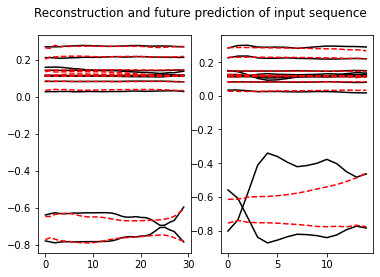

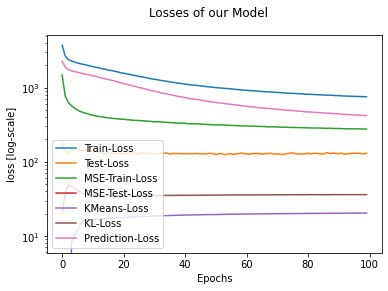

In [14]:
# Evaluate the network

vame.evaluate_model(config, model_name='VAME_prey_model')

In [15]:
# Segment behavior

vame.behavior_segmentation(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=[30])

Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti
Computing latent space for 09_08_2020_15_56_34_miniscope_DG_200617_b_succ_injured_nofluo 
Computing latent space for 09_08_2020_15_54_36_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_50_32_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_47_44_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_43_03_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_39_45_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_36_13_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_08_2020_15_32_30_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_26_21_miniscope_DG_200701_a_succ 
Computing latent space for 09_08_2020_15_23_32_miniscope_DG_200701_a_succ 
Computing latent space for 09_08_2020_15_20_34_miniscope_DG_200701_a_succ 
Computing latent space for 09_08_2020_15_16_25_miniscope_DG_200701_a_succ 
Computing latent sp

Computing latent space for 09_02_2020_16_50_16_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_45_55_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_41_25_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_37_35_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_34_36_miniscope_DG_200701_a_succ 
Computing latent space for 09_02_2020_16_30_27_miniscope_DG_200701_a_succ_injured 
Computing latent space for 09_01_2020_16_58_35_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_01_2020_16_55_25_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_01_2020_16_47_10_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_43_46_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_39_52_miniscope_DG_200617_b_succ_injured 
Computing latent space for 09_01_2020_16_34_42_miniscope_DG_200617_b

Computing latent space for 08_19_2020_16_33_11_miniscope_DG_200617_b_succ_injured 
Computing latent space for 08_19_2020_16_27_02_miniscope_DG_200617_b_succ 
Computing latent space for 08_19_2020_16_16_55_miniscope_DG_200701_a_succ_noncon 
Computing latent space for 08_19_2020_16_11_32_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_19_2020_16_09_08_miniscope_DG_200701_a_succ 
Computing latent space for 08_19_2020_16_05_59_miniscope_DG_200701_a_succ_grabbedcable 
Computing latent space for 08_19_2020_16_01_41_miniscope_DG_200701_a_succ 
Computing latent space for 08_19_2020_15_58_22_miniscope_DG_200701_a_succ 
Computing latent space for 08_19_2020_15_55_28_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_19_2020_15_51_39_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_18_2020_16_45_57_miniscope_DG_200617_b_succ 
Computing latent space for 08_18_2020_16_41_33_miniscope_DG_200617_b_succ 
Computing latent space for 08_18_2020_16_38_40_m

Computing latent space for 08_12_2020_16_30_56_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_24_56_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_21_45_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_17_05_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_14_41_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_12_08_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_06_17_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_02_32_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_15_56_49_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_51_54_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_47_44_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_44_23_miniscope_DG_200701_a_succ_noncon 
Computing latent space for 08_12_2020_15_39_17_miniscope_DG_200701_a_succ 
Computing latent s

Computing latent space for 08_06_2020_17_41_32_miniscope_DG_200701_a_succ 
Computing latent space for 08_06_2020_17_37_15_miniscope_DG_200701_a_succ 
Computing latent space for 08_06_2020_17_33_37_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_16_20_09_miniscope_DG_200617_b_succ 
Computing latent space for 08_05_2020_16_11_00_miniscope_DG_200617_b_succ 
Computing latent space for 08_05_2020_16_06_18_miniscope_DG_200617_b_succ_earlystop 
Computing latent space for 08_05_2020_15_55_12_miniscope_DG_200617_b_succ 
Computing latent space for 08_05_2020_15_43_21_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_15_36_29_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_15_29_56_miniscope_DG_200701_a_succ 
Computing latent space for 08_05_2020_15_22_44_miniscope_DG_200701_a_succ 
Computing latent space for 03_13_2020_14_00_19_miniscope_MM_200129_b_succ 
Computing latent space for 03_13_2020_13_53_47_miniscope_MM_200129_b_succ 
Computing laten

Computing latent space for 12_09_2019_16_49_50_miniscope_MM_191106_a_succ_nomini 
Computing latent space for 12_09_2019_16_46_19_miniscope_MM_191106_a_succ_nomini 
Computing latent space for 12_09_2019_16_41_05_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_09_2019_16_38_36_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_09_2019_16_34_39_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_09_2019_15_34_10_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_15_30_13_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_15_25_14_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_15_21_10_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_15_16_05_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_15_12_24_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_15_08_33_miniscope_M

Computing latent space for 03_02_2020_16_15_37_miniscope_MM_200129_b_fail 
Computing latent space for 03_02_2020_16_09_51_miniscope_MM_200129_b_fail 
Computing latent space for 12_16_2019_16_34_45_miniscope_MM_191108_a_fail 
Computing latent space for 12_16_2019_16_21_34_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_23_10_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_18_57_miniscope_MM_191108_a_fail 
Computing latent space for 12_12_2019_15_11_45_miniscope_MM_191108_a_fail 
Computing latent space for 12_11_2019_17_14_34_miniscope_MM_191108_a_fail_miniscopeafterbonsai 
Computing latent space for 12_10_2019_15_43_20_miniscope_MM_191108_a_fail 
Computing latent space for 12_10_2019_15_23_16_miniscope_MM_191108_a_fail 
Computing latent space for 12_07_2019_15_56_10_miniscope_MM_191108_a_fail 
Computing latent space for 12_03_2019_16_42_00_miniscope_MM_191108_a_fail_nomini 
Computing latent space for 12_03_2019_16_34_28_miniscope_MM_191108_a_fai

Segmentation for file 09_02_2020_17_17_37_miniscope_DG_200617_b_succ...
Segmentation for file 09_02_2020_17_13_08_miniscope_DG_200617_b_succ...
Segmentation for file 09_02_2020_16_55_43_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_53_10_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_50_16_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_45_55_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_41_25_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_37_35_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_34_36_miniscope_DG_200701_a_succ...
Segmentation for file 09_02_2020_16_30_27_miniscope_DG_200701_a_succ_injured...
Segmentation for file 09_01_2020_16_58_35_miniscope_DG_200617_b_succ_injured...
Segmentation for file 09_01_2020_16_55_25_miniscope_DG_200617_b_succ...
Segmentation for file 09_01_2020_16_52_15_miniscope_DG_200617_b_succ_injured...
Segmentation for file 09_01_2020_16_47_1

Segmentation for file 08_15_2020_16_02_16_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_58_47_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_54_28_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_52_25_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_49_06_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_45_13_miniscope_DG_200701_a_succ...
Segmentation for file 08_15_2020_15_41_21_miniscope_DG_200701_a_succ...
Segmentation for file 08_14_2020_15_57_32_miniscope_DG_200617_b_succ...
Segmentation for file 08_14_2020_15_54_58_miniscope_DG_200617_b_succ...
Segmentation for file 08_14_2020_15_50_50_miniscope_DG_200617_b_succ...
Segmentation for file 08_14_2020_15_47_26_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_14_2020_15_44_42_miniscope_DG_200617_b_succ...
Segmentation for file 08_14_2020_15_40_19_miniscope_DG_200617_b_succ...
Segmentation for file 08_14_2020_15_37_49_miniscope_DG_2

Segmentation for file 03_02_2020_16_20_39_miniscope_MM_200129_b_succ...
Segmentation for file 03_02_2020_15_59_15_miniscope_MM_200129_a_succ...
Segmentation for file 03_02_2020_15_54_55_miniscope_MM_200129_a_succ...
Segmentation for file 03_02_2020_15_50_05_miniscope_MM_200129_a_succ...
Segmentation for file 03_02_2020_15_45_20_miniscope_MM_200129_a_succ_nomini...
Segmentation for file 03_02_2020_15_41_21_miniscope_MM_200129_a_succ_nomini...
Segmentation for file 03_02_2020_15_35_18_miniscope_MM_200129_a_succ_nomini...
Segmentation for file 12_16_2019_16_31_08_miniscope_MM_191108_a_succ...
Segmentation for file 12_16_2019_16_27_17_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_32_29_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_27_48_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_16_04_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_08_15_miniscope_MM_191108_a_succ...
Segmentation for file 12_12_2019_15_04_45_m

Segmentation for file 12_02_2019_17_33_47_miniscope_MM_191107_a_succ_nomini...
Segmentation for file 12_02_2019_17_26_56_miniscope_MM_191107_a_succ_nomini...
Segmentation for file 12_02_2019_17_18_30_miniscope_MM_191107_a_succ_nomini...
Segmentation for file 12_02_2019_17_08_58_miniscope_MM_191107_a_succ_nomini...
Segmentation for file 11_14_2019_17_50_12_miniscope_DG_190810_a_succ_nomini...
Segmentation for file 11_14_2019_17_46_42_miniscope_DG_190810_a_succ_nomini...
Segmentation for file 11_14_2019_17_43_07_miniscope_DG_190810_a_succ_nomini...
Segmentation for file 11_14_2019_17_39_46_miniscope_DG_190810_a_succ_nomini...
Segmentation for file 11_14_2019_17_30_44_miniscope_DG_190806_a_succ_nofluo...
Segmentation for file 11_14_2019_17_24_28_miniscope_DG_190806_a_succ_nofluo...
Segmentation for file 11_14_2019_17_19_46_miniscope_DG_190806_a_succ_nofluo...
Segmentation for file 11_14_2019_17_15_24_miniscope_DG_190806_a_succ_nofluo...
Segmentation for file 11_13_2019_18_25_56_miniscope_

In [16]:
# Quantify behavior

vame.behavior_quantification(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=30)

C:\Users\setup\.conda\envs\vame\lib\site-packages\vame-0.1-py3.7.egg\vame\analysis\behavior_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
